<a href="https://colab.research.google.com/github/hsallrounder/Neural-Networks-Lab/blob/main/Neural_Networks_Lab_10_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
test_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [ ]:
mean=train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
def build_model():
  model=keras.Sequential([
      layers.Dense(64,input_dim=13,activation="relu"),
      layers.Dense(64,activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  return model

In [ ]:
model=build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


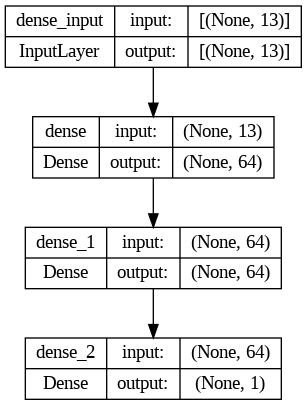

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file = "model_plot.png", show_shapes=True,show_layer_names=True)

In [ ]:
history=model.fit(train_data,train_targets,validation_split=0.2,epochs=100,batch_size=16,verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 509.6590 - mae: 20.4542 - val_loss: 507.0764 - val_mae: 20.4771
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 381.7791 - mae: 17.2410 - val_loss: 361.0397 - val_mae: 16.7164
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 242.4759 - mae: 13.2088 - val_loss: 216.0724 - val_mae: 12.2599
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 129.3776 - mae: 9.1429 - val_loss: 115.1769 - val_mae: 8.0563
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 67.1473 - mae: 6.2311 - val_loss: 65.8161 - val_mae: 5.7883
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 42.9343 - mae: 4.7024 - val_loss: 46.5954 - val_mae: 4.6922
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 32.0646 - mae: 3.8961 - val_loss: 35.1087 - val_mae: 4.1413
Epoch 8/100
21/21 [==============================] - 

In [ ]:
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 23.9317 - mae: 2.9131


In [ ]:
test_mae_score

2.9131054878234863

In [ ]:
import matplotlib.pyplot as plt

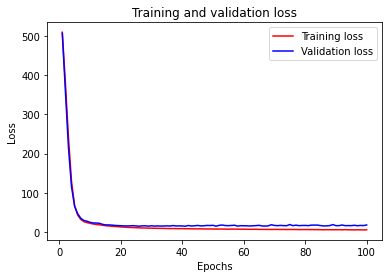

In [ ]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"r",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_data)
print(predictions[0],
      predictions[1],
      predictions[2]
      )

4/4 [==============================] - 0s 3ms/step
[8.873887] [19.399279] [21.963411]
